# Analiza matematyczna z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 1

UMIEŚĆ SWÓJ KOD TUTAJ### Przygotowanie do pracy

Materiały zrealizuj na komputerach wydziałowych pod systemem Linux.

Uzupełnij poniższą zmienną `IMIE_NAZWISKO` swoim imieniem i nazwiskiem, a następnie ją uruchom - dzięki temu sprawdzisz, czy kernel Pythona działa poprawnie.

In [45]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Załadujmy niezbędne biblioteki:

In [46]:
import numpy as np
import struct

### Systemy pozycyjne

[Systemy pozycyjne](https://pl.wikipedia.org/wiki/Systemy_pozycyjne) to metody zapisu liczb, w których wartość cyfry zależy od jej pozycji w ciągu. Najbardziej znanym systemem pozycyjnym jest [system dziesiętny](https://pl.wikipedia.org/wiki/Dziesi%C4%99tny_system_liczbowy), używany na co dzień, gdzie każda pozycja reprezentuje potęgę liczby 10. W informatyce kluczowy jest [system dwójkowy](https://pl.wikipedia.org/wiki/Dw%C3%B3jkowy_system_liczbowy), gdzie używa się tylko cyfr 0 i 1, oraz [system szesnastkowy](https://pl.wikipedia.org/wiki/Szesnastkowy_system_liczbowy), który ułatwia zapis dużych liczb, np. adresów pamięci. Każdy system pozycyjny ma swoją podstawę, określającą, ile różnych cyfr jest używanych do zapisu liczb. Dzięki systemom pozycyjnym możemy w prosty sposób wykonywać operacje arytmetyczne i reprezentować bardzo duże lub bardzo małe liczby.

Przykładowe zamiany między systemami pozycyjnymi można znaleźć w pliku [`ani1-lab01-1-systemy-pozycyjne-przyklady.xlsx`](ani1-lab01-1-systemy-pozycyjne-przyklady.xlsx).

##### Ćwiczenie 1

Analogicznie uzupełnij przykładowe zamiany między systemami pozycyjnymi w pliku [`ani1-lab01-2-systemy-pozycyjne-cwiczenia.xlsx`](ani1-lab01-2-systemy-pozycyjne-cwiczenia.xlsx).

### Artytmetyka liczb całkowitych

[Liczby całkowite](https://pl.wikipedia.org/wiki/Liczba_ca%C5%82kowita_(typ_danych)) w pamięci komputera są zapisywane jako ciągi bitów o określonej długości np. 16-bitowe (2-bajtowe) wartości. W zależności od sposobu interpretacji bitów liczby mogą być traktowane jako **bez znaku** (ang. *unsigned*) lub **ze znakiem** (ang. *signed*).

[Kolejność zapisu bajtów w pamięci](https://pl.wikipedia.org/wiki/Kolejno%C5%9B%C4%87_bajt%C3%B3w) (ang. *byte order* lub *endianness*) zależy od architektury procesora i może przyjmować dwie formy:  

* **big-endian** – najbardziej znaczący bajt umieszczony jest jako pierwszy,
* **little-endian** –  najmniej znaczący bajt umieszczony jest jako pierwszy.

Format *little-endian* jest spotykany np. w architekturze rodziny [x86](https://pl.wikipedia.org/wiki/X86), a *big-endian* w [MIPS](https://en.wikipedia.org/wiki/MIPS_architecture).

Liczby całkowite ze znakiem są najczęściej zapisywane w [kodzie uzupełnień do dwóch U2](https://pl.wikipedia.org/wiki/Kod_uzupe%C5%82nie%C5%84_do_dw%C3%B3ch), który umożliwia łatwe wykonywanie operacji arytmetycznych. W tym formacie:  

- najbardziej znaczący bit pełni rolę **bitu znaku** (0 oznacza liczbę dodatnią, 1 oznacza liczbę ujemną),  
- liczba minimalna (np. $-32768$ dla 16-bitowej wartości) ma ustawiony tylko najbardziej znaczący bit,  
- liczba ujemna powstaje poprzez odwrócenie wszystkich bitów liczby dodatniej i dodanie 1.

Poniższy rysunek obrazuje wybrane reprezentacje:

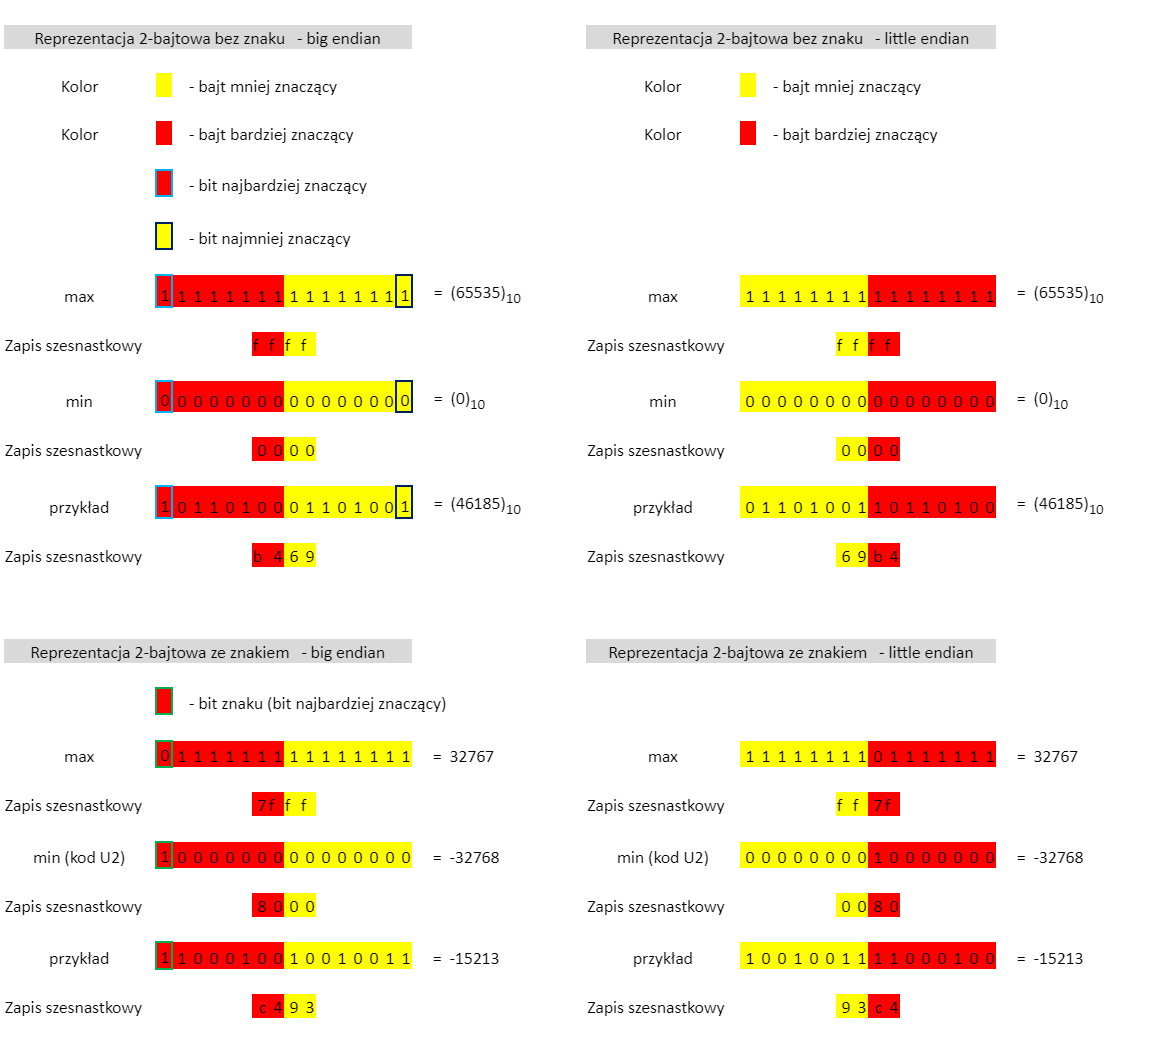

#### Uwagi

Wartość $32768$ formalnie nie jest reprezentowana na 15 bitach. Wartość maksymalna liczby całkowitej 2-bajtowej ze znakiem to $32767$.

Kod *U2* dla liczby $-32767$ to `1000000000000001`. 

Obliczmy kod *U2* dla liczby `0000000000000000` (zero na 2 bajtach):

```plaintext
  1111111111111111  zamiana znaków
+ 0000000000000001  dodawana jedynka
------------------
 10000000000000000  przekroczenie zakresu,
                    czyli U2(0000000000000000) = 0000000000000000
```

Zatem dla zera kod *U2(zero) = zero*.

Czy istnieje inna liczba dla której: *U2(liczba) = liczba*?

Rozpatrzmy reprezentację 16-bitową liczby `1000000000000000` (w notacji bez znaku jest to liczba $32768$). Jej kod *U2* obliczamy w 2 krokach:

1. zamieniamy znaki na przeciwne:

   `1000000000000000 -> 0111111111111111`

2. dodajemy jedynkę: 

   `0111111111111111 -> 1000000000000000`

Wynika z tego, że *U2(dana) = dana*.

Jednak w reprezentacji 16-bitowej ze znakiem wartość `1000000000000000` oznacza zero. Zatem w tej reprezentacji zero ma dwie możliwe postaci - w obu przypadkach *U2(postać) = postać*.

Stąd mamy nadmiarowość reprezentacji zera i możemy jedną z tych postaci użyć do reprezentacji dodatkowej wartości: $-32768$. W ogólności dla reprezentacji $n$-bajtowej ze znakiem zakres wartości to przedział $\left[-2^{n-1}; 2^{n-1}-1 \right]$.

#### Działania

Poniższy rysunek przedstawia przykłady operacji na poziomie bitów:

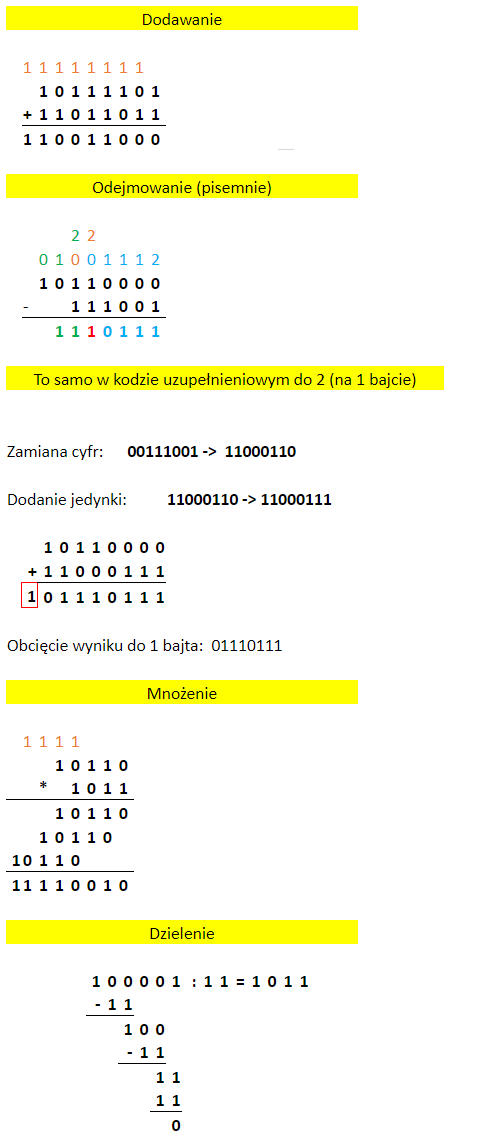

##### Ćwiczenie 2

Sprawdź przy pomocy Pythona jaka jest stosowana kolejność bajtów na komputerze, na którym pracujesz.

In [47]:
# UMIEŚĆ SWÓJ KOD TUTAJ
import sys
print(sys.byteorder)

little


----

Za chwilę spróbujemy rozwiązać powyższe zadanie, ale nieco inaczej. Podczas zajęć napiszemy kilka krótkich programów w języku C - standardowo w infrastrukturze wydziałowej możemy je skompilować przy pomocy polecenia `gcc` pod architekturę z rodziny x86. Natomiast ten sam kod możemy skompilować dla architektury MIPS poleceniem `mips-linux-gnu-gcc`, jednak by go potem tu uruchomić (tj. na maszynie x86) musimy tak skompilowany program uruchomić przez `qemu-mips`, czyli emulator [QEMU (Quick Emulator)](https://en.wikipedia.org/wiki/QEMU) skonfigurowany do emulacji maszyny MIPS.

Uwaga: w następnych komórkach wykorzystamy tzw. *magic cell* Jupytera, tj. [`%%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile) do zapisu pliku oraz [`!`](https://ipython.readthedocs.io/en/stable/interactive/reference.html#system-shell-access) do uruchomienia polecenia w systemie (ew. [`%%bash`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-bash) dla powłoki Bash).

##### Zadanie 1 (2 pkt.)

Uzupełnij poniższą funkcję w języku C, tak by program wypisywał na standardowym wyjściu informację o [kolejności bajtów](https://pl.wikipedia.org/wiki/Kolejno%C5%9B%C4%87_bajt%C3%B3w") w zależności od architektury zestawu instrukcji procesora.

<details><summary>Podpowiedź 🎁</summary>Użyj <a href="https://www.learn-c.org/en/Unions">unii</a> do zapisania liczby 32-bitowej i sprawdź, w którym bajcie znajduje się najbardziej znaczący bajt.</details>

Przykładowe przypadki testowe:

| Test | Architektura | Oczekiwany wynik |
| ---- | --------- | ---------------- |
| `gcc -static -o bin-1-1 code-1-1.c && ./bin-1-1` | x86 | `Little-Endian` |
| `mips-linux-gnu-gcc -static -o bin-1-1 code-1-1.c && qemu-mips ./bin-1-1` | MIPS big-endian | `Big-Endian` |

In [48]:
%%writefile code-1-1.c
#include <stdio.h>
#include <stdint.h>

union number{
    uint32_t i;
    unsigned char b[sizeof(uint32_t)];
};

int is_big_endian() {
    // UMIEŚĆ SWÓJ KOD TUTAJ
    union number n;
    n.i = 1;
    return n.b[0] == 0b00000000;
}

int main() {
    if (is_big_endian()) {
        printf("Big-Endian\n");
    } else {
        printf("Little-Endian\n");
    }
    return 0;
}

Overwriting code-1-1.c


In [49]:
!gcc -static -o bin-1-1 code-1-1.c && bin-1-1

Little-Endian


##### Ćwiczenie 3

Uzupełnij przykładowe operacje dla liczb całkowitych znajdujące się w pliku [`ani1-lab01-3-liczby-calkowite-cwiczenia.xlsx`](ani1-lab01-3-liczby-calkowite-cwiczenia.xlsx).

### Artytmetyka liczb ułamkowych – standard IEEE 754

[IEEE 754](https://pl.wikipedia.org/wiki/IEEE_754) to powszechnie stosowany standard do reprezentacji [liczb zmiennoprzecinkowych](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) w komputerach. Definiuje on sposób przechowywania oraz operacje arytmetyczne na liczbach rzeczywistych, zapewniając spójność obliczeń na różnych platformach sprzętowych. Najczęściej spotykane są standardy pojedynczej precyzji (ang. *single*, 32 bity) i podwójnej precyzji (ang. *double*, 64 bity).

Liczby zmiennoprzecinkowe w IEEE 754 składają się z trzech głównych części:  

1. **bit znaku** (1 bit) – określa znak liczby:  
   
   * `0` oznacza liczbę dodatnią,
   * `1` oznacza liczbę ujemną,  

2. **cecha** (8 bitów w standardzie pojedynczej precyzji, 11 bitów w podwójnej precyzji) – zapisuje wykładnik potęgi liczby 2, z przesunięciem (bias), co umożliwia reprezentację zarówno bardzo małych, jak i bardzo dużych liczb,  
3. **mantysa** (23 bity w pojedynczej precyzji, 52 bity w podwójnej precyzji) – reprezentuje wartość liczby w postaci znormalizowanej, gdzie pierwszy bit (1) jest domyślnie pominięty w zapisie.  

Liczba zmiennoprzecinkowa w IEEE 754 jest interpretowana jako:  

$$
\text{wartość} = (-1)^{\text{znak}} \times 2^{(\text{cecha} - \text{bias})} \times (1 + \text{mantysa})
$$

gdzie:
  
* **bias** to wartość przesunięcia dla cechy:  
  * 127 dla pojedynczej precyzji (32 bity),  
  * 1023 dla podwójnej precyzji (64 bity).  
* mantysa zawiera tylko część ułamkową (znormalizowaną).

#### Normalizacja mantysy

Mantysa jest normalizowana, aby maksymalizować precyzję zapisu liczby. Normalizacja polega na przesunięciu przecinka w taki sposób, aby przed nim znajdowała się cyfra 1 (w systemie binarnym). Ten bit jest domyślnie pomijany w zapisie, co pozwala na zaoszczędzenie jednego bitu i zwiększenie precyzji.

#### Liczby zdenormalizowane

Liczby zdenormalizowane są używane do reprezentowania bardzo małych liczb, które są bliższe zeru niż najmniejsza normalizowana liczba zmiennoprzecinkowa. W liczbach zdenormalizowanych cecha ma wartość minimalną (0), a pierwszy bit mantysy nie jest już domyślnie 1.

#### Specjalne wartości i inne problemy

Standard IEEE 754 obsługuje również specjalne wartości:
  
* **Zero** – zarówno `+0`, jak i `-0` są możliwe.  
* **Infinity** (`±∞`) – dla przepełnienia.  
* **Not a Number (NaN)** – dla wyników operacji niezdefiniowanych, np. `0/0`.  
  
IEEE 754 jest fundamentalnym standardem w obliczeniach numerycznych. Jego struktura pozwala na reprezentację bardzo małych i bardzo dużych liczb, choć ograniczona precyzja może prowadzić do błędów zaokrągleń w niektórych przypadkach. Np. $0.1$ w systemie dziesiętnym nie ma dokładnej reprezentacji binarnej, co prowadzi do błędów zaokrągleń. Sprawdź poniższy kod:

In [50]:
print(0.1 + 0.2)

0.30000000000000004


#### Przykłady dla pojedynczej precyzji (single)

##### Reprezentacje liczb

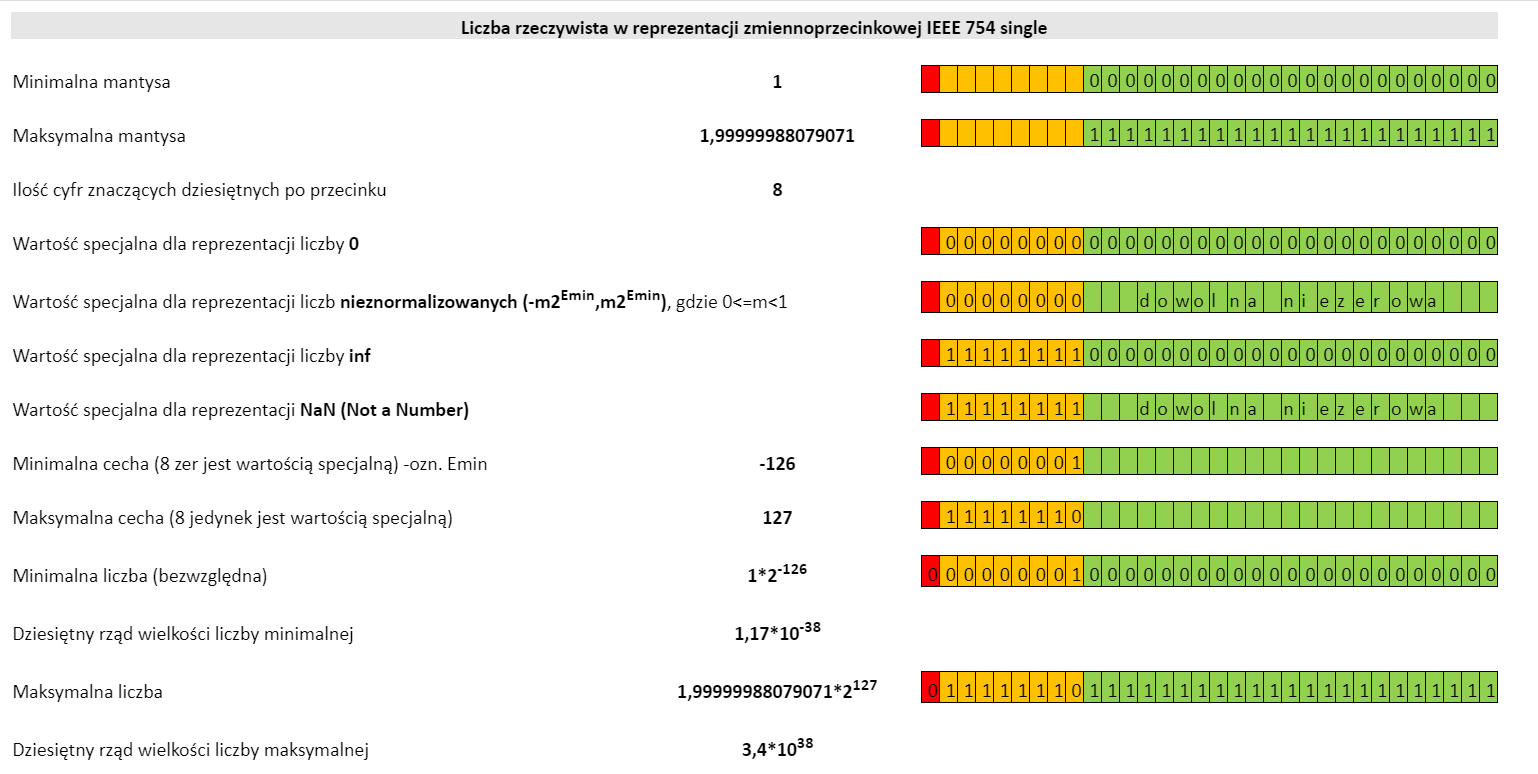

##### Zamiana liczby rzeczywistej na reprezentację zmiennoprzecinkową

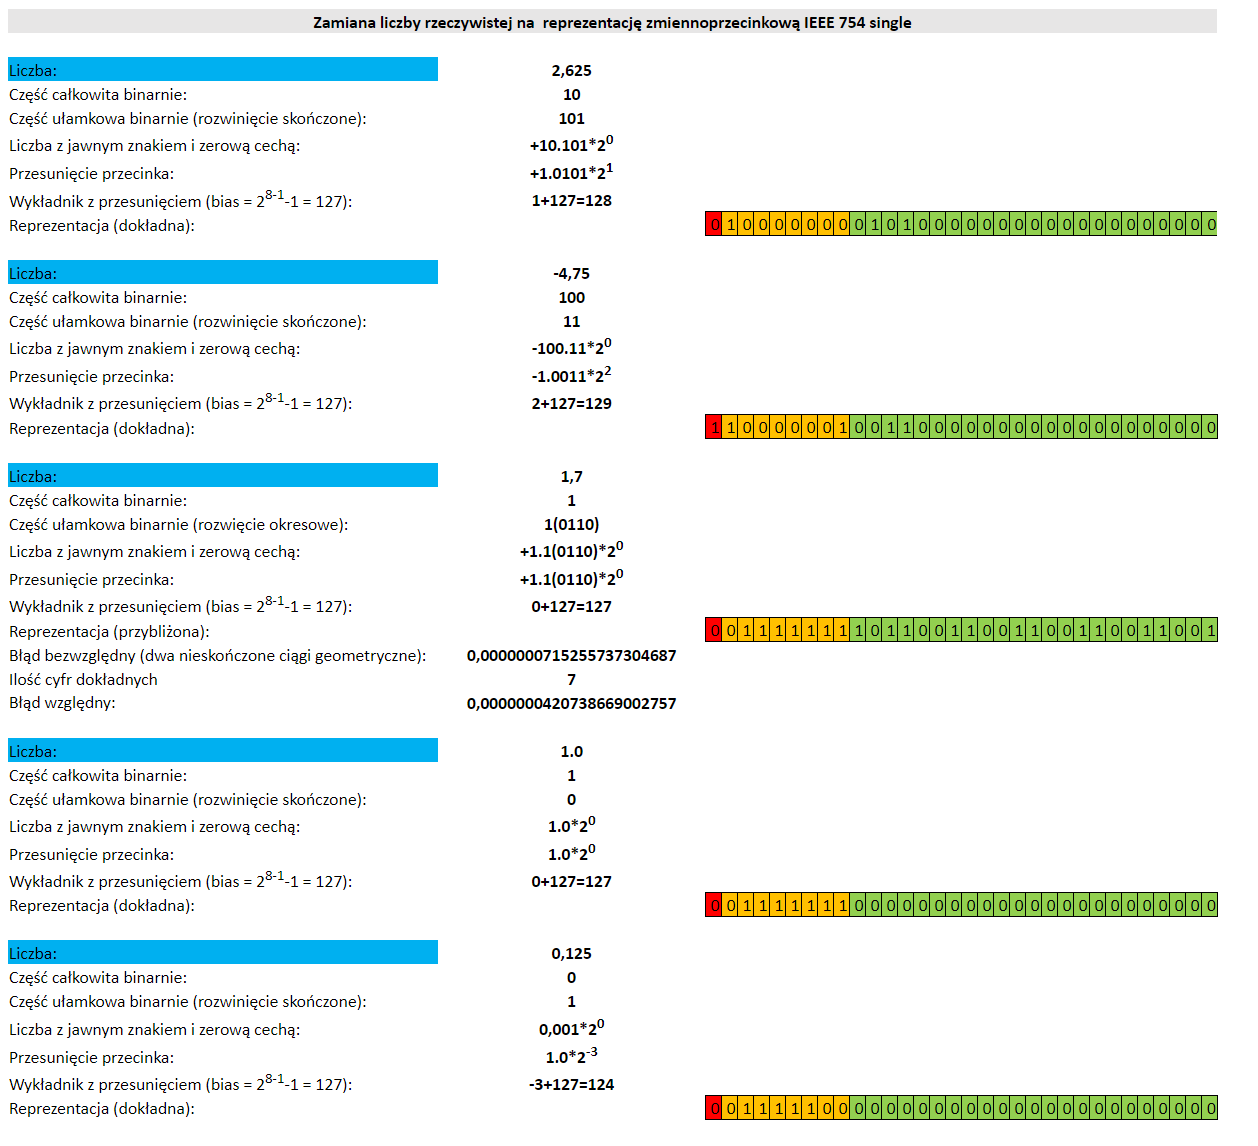

##### Dodawanie liczb

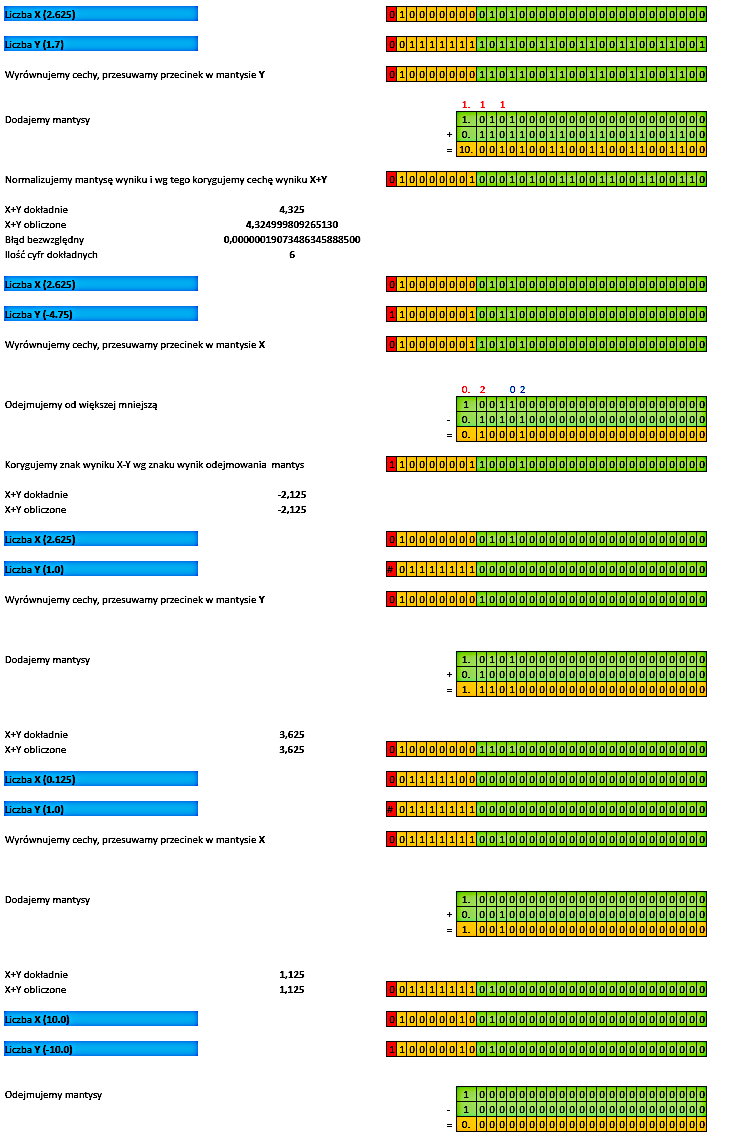

##### Ćwiczenie 4

Uzupełnij przykładowe operacje dla liczb całkowitych znajdujące się w pliku [`ani1-lab01-4-liczby-rzeczywiste-cwiczenia.xlsx`](ani1-lab01-4-liczby-rzeczywiste-cwiczenia.xlsx).

##### Zadanie 2 (3 pkt.)

Uzupełnij w języku Python poniższą funkcję `single_754(value)`, tak by wyświetlała poniższe informacje:

* wartość `value` przekazana do funkcji,
* wartości binarne w formacie: `[znak] [cecha] [mantysa]`,
* wartości dziesiętne (odkodowane) w formacie: `[znak][2^cecha] * [znormalizowana wartość mantysy]`.

Możesz skorzystać z udostępnionej funkcji pomocniczej.

<details><summary>Podpowiedź 🎁</summary>Podziel liczbę na znak, cechę i mantysę używając przy tym <a href="https://www.askpython.com/python/examples/python-bit-manipulation-masking-techniques">przesunięć bitowych i masek</a>.</details>

Przypadek testowy:

```python
single_754(3.5)
```

Oczekiwany wynik:

```plaintext
3.5
0 10000000 11000000000000000000000
+2^1 * 1.75
```

Przypadek testowy:

```python
single_754(-3.5)
```


Oczekiwany wynik:

```plaintext
-3.5
1 10000000 11000000000000000000000
-2^1 * 1.75
```

In [51]:
def print_binary(num, bits):  
    return ''.join(str((num >> i) & 1) for i in range(bits - 1, -1, -1))  
    
def single_754(value):  
    # pack the float into 4 bytes using IEEE 754 single precision  
    packed = struct.pack('!f', value)  
    # unpack those bytes into an unsigned 32-bit integer  
    unpacked = struct.unpack('!I', packed)[0]  
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    print(value)

    sign = (unpacked >> 31) & 0x1
    exp = (unpacked >> 23) & 0xFF
    mat = unpacked & 0x7FFFFF 

    exp -= 127
    mat = mat / (2 ** 23) + 1

    string = f"{print_binary(unpacked, 32)}"
    ss = ""
    for i in range(0, 32):
        if(i == 1 or i == 9): ss += " "
        ss += string[i]

    print(ss)
    if(not sign): print("+2^",exp, " * ", mat, sep="")
    else: print("-2^",exp, " * ", mat, sep="")

single_754(3.5)

3.5
0 10000000 11000000000000000000000
+2^1 * 1.75


##### Zadanie 3 (3 pkt.)

Uzupełnij w języku C poniższą funkcję `int32_bytes_bits(int v)`, która wypisuje na standardowe wyjście następujące informacje dla 32-bitowej liczby całkowitej (`int`):

* wartość przekazanego parametru (liczba całkowita `v`);
* bajty liczby `v` w kolejności sprzętowej (*endianness*) jako liczby dziesiętne oddzielone spacjami;
* reprezentację binarną liczby `v` w **odwrotnej** kolejności sprzętowej (*endianness*), gdzie bity są pogrupowane po 8 i oddzielone spacjami.

Zadanie będzie testowane na architekturach x86 oraz MIPS.

<p><details><summary>Podpowiedź 🎁</summary>Możesz użyć <a href="https://www.learn-c.org/en/Unions">unii</a> do dostępu do bajtów liczby. Aby wypisać reprezentację binarną w odwrotnej kolejności sprzętowej, iteruj po bitach każdego bajtu, ale zaczynając od ostatniego bajtu w tablicy. Możesz użyć operacji bitowych (<code>&amp;</code> i <code>&lt;&lt;</code>), aby sprawdzić i wydobyć poszczególne bity.</details></p>

<table>
<thead>
<tr>
<th>Test</th>
<th>Standardowe wejściowe</th>
<th>Oczekiwany wynik</th>
</tr>
</thead>
<tbody><tr>
<td><pre># x86
gcc -static -o bin-1-3 code-1-3.c
./bin-1-3</pre></td>
<td><pre>12345
-12345</pre></td>
<td><pre>12345
57 48 0 0 
00000000 00000000 00110000 00111001 
-----------------------------------
-12345
-57 -49 -1 -1 
11111111 11111111 11001111 11000111 
-----------------------------------</pre></td>
</tr>
<tr>
<td><pre># MIPS big-endian
mips-linux-gnu-gcc -static -o bin-1-3 code-1-3.c
qemu-mips ./bin-1-3</pre></td>
<td><pre>12345
-12345</pre></td>
<td><pre>12345
0 0 48 57
00111001 00110000 00000000 00000000
-----------------------------------
-12345
-1 -1 -49 -57
11000111 11001111 11111111 11111111
-----------------------------------
</pre></td>
</tr>
</tbody>
</table>

In [52]:
%%writefile code-1-3.c
#include <stdio.h>
#include <limits.h>

union Number{
    int v;
    char b[sizeof(int)];
};

void int32_bytes_bits(int v) {
    // UMIEŚĆ SWÓJ KOD TUTAJ
    printf("%d\n", v);
    union Number n;
    n.v = v;

    for(int i = 0; i < sizeof(int); i++) printf("%d ", n.b[i]);
    printf("\n");

    for(int i = sizeof(int) - 1; i >= 0 ; i--){
        char c = n.b[i];
        for(int j = 7; j >= 0; j--){
            printf("%d", (c >> j) & 1);
        }
        printf(" ");
    }

    printf("\n");
    
}

int main() {
    int num;
    
    while (scanf("%d", &num) == 1) {
        int32_bytes_bits(num);
        printf("-----------------------------------\n");
    }

    return 0;
}

Overwriting code-1-3.c


In [53]:
%%bash
set -e

gcc -static -o bin-1-3 code-1-3.c

./bin-1-3 << EOF
12345
-12345
EOF

Couldn't find program: 'bash'


In [54]:
!gcc -static -o bin-1-3 code-1-3.c

### Źródła i typy błędów 

Na wyniki numeryczne wpływa wiele rodzajów błędów. Niektóre źródła błędów są trudne do wyeliminowania, a inne można ograniczyć lub nawet wyeliminować, na przykład zmieniając postać formuł analicznych 
lub kolejniość sekwencji obliczeniowej. Ponadto trzeba pamiętać, że błędy są propagowane z ich
wielkości źródłowych  do wielkości obliczonych później, czasem ze znacznym wzmocnieniem lub tłumieniem.

#### Źródła błędów

##### Błędy w  danych wejściowych

Dane wejściowe mogą być wynikiem pomiarów, które zostały zanieczyszczone
różne rodzaje błędów. Ogólnie rzecz biorąc, należy zachować ostrożność przy rozróżnianiu
błędów *systematycznych* i błędy *losowych*. Błąd systematyczny może być np.
spowodowany niedoskonałościami w konstrukcji przyrządu pomiarowego - taki błąd jest taki sam w każdej próbie. Błędy losowe zależą od losowych zmian w  środowisku eksperymentu i zwykle  nie można ich kontrolować.

##### Błędy zaokrągleń podczas obliczeń

Błąd *zaokrąglenia* występuje zawsze, gdy skraca się liczbę niewymierną, na przykład $\pi$
("zaokrąglone") do ustalonej liczby cyfr lub podczas konwersji ułamka dziesiętnego
do postaci binarnej używanej w komputerze. Ograniczenia liczb zmiennoprzecinkowych w
komputerze prowadzi czasami do utraty informacji, co w zależności od kontekstu może nastąpić
lub może nie być ważne. Są dwa typowe przypadki

- Jeśli komputer nie jest w stanie obsłużyć liczb składających się z więcej niż, powiedzmy $s$ cyfr, dokładny iloczyn dwóch liczb $s$-cyfrowych (który posiada $2s$ lub $2s - 1$ cyfr) nie może zostać wykorzystany w kolejnych obliczeniach; taki iloczyn należy zaokrąglić.

-  W obliczeniach zmiennoprzecinkowych, jeśli do $a$ zostanie dodany stosunkowo mały człon $b$, wówczas niektóre cyfry $b$ zostaną "przesunięte" i nie będą miały żadnego wpływ na przyszłe wielkości zależne od wartości $a + b$. Efekt takiego zaokrąglenia może być dość zauważalny w rozbudowanych obliczeniach lub w algorytmie numerycznie niestabilnym.

##### Błędy obcięcia

Są to błędy popełniane, gdy proces ograniczający został wcześniej obcięty (przerwany) - 
osiągnięto wartość graniczną. Błąd obcięcia występuje, na przykład, gdy
nieskończony szereg zostaje 'zerwany' po skończonej liczbie wyrazów lub w przypadku pochodnej
przybliżonej ilorazem różnicy (choć w tym przypadku termin *dyskretyzacja*
błąd jest lepszy). Innym przykładem jest aproksymacja funkcji nieliniowej za pomocą
funkcji liniowej, jak np. w *metodzie Newtona*. Zwróć uwagę na różnicę między 
błądem obcięcia i błądem zaokrąglenia.

##### Uproszczenia w modelu matematycznym

W większości zastosowań matematyki dokonuje się idealizacji, np. w mechanicznym
problemie wahadła można założyć, że struna w wahadle ma masę zerową. W wielu innych
W przypadku fizycznych typów problemów korzystne jest uznanie danego ciała za jednorodnie
wypełnione materią, zamiast zbudowane z atomów. Do obliczeń w ekonomii,
można założyć, że stopa procentowa jest stała w danym okresie. 
Skutki takich źródeł błędów są zwykle trudniejsze do oszacowania niż ich rodzaje
wymienione w trzech poprzednich punktach.

##### Błędy "ludzkie" i błędy maszynowe

We wszystkich pracach numerycznych należy spodziewać się błędów pisarskich, błędów w ręcznych obliczeniach,
i zwykłych pomyłek. Należy mieć nawet świadomość, że podręczniki,
tabele i formuły mogą zawierać błędy. Kiedy ktoś korzysta z komputerów, można się spodziewać podobnych
błędów w samym programie, błędów w pisowni przy wprowadzaniu danych, błędów operatora i
(rzadziej) czystych błędów maszynowych.

#### Błędy bezwzględne i względne

Aproksymacja jest centralnym pojęciem w prawie wszystkich zastosowaniach matematyki. Często trzeba
zadowalać się przybliżonymi wartościami wielkości, z którymi się pracuje. Inny
rodzaj przybliżenia ma miejsce, gdy ignoruje się pewne wielkości, które są małe w porównaniu
do innych. Takie przybliżenia są często konieczne, aby zapewnić, że matematyczne i
numeryczne opracowanie problemu nie staje się beznadziejnie skomplikowane.

**Definicja**

> Niech $\tilde{x}$ będzie wartością przybliżoną, której dokładna wartość wynosi $x$. *Błąd bezwzględny* zawarty w $\tilde{x}$  jest określony przez wyrażenie
> $$
\Delta x =|\tilde{x} − x|,
$$
>
>natomiast  jeśli $x \not = 0$, to *błąd względny* określa wyrażenie
>$$
r:=\frac{\Delta x}{x} = \left|\frac{\tilde{x} - x}{x}\right|.
$$

Notacja $x = \tilde{x}\pm \varepsilon$ oznacza, że $| \tilde{x} − x| \leq \varepsilon$. Jeśli $x$ jest wielością wektorową, to zamiast wartości bezwzględnej w powyższej definicji posługujmy się adekwatną *normą wektorową*.   

#### Zaokrąglanie i obcinanie

W ułamu dzisiętnym rozróżniamy pojęcia cyfr istotych oraz cyfr ułamkowych. 
Pojęcie *cyfry istotne* wartości ułamka dziesiętnego, nie uwzględnia zer
na początku sekwencji ułamkowej, ponieważ te zera pomagają jedynie wskazać, gdzie znajduje się przecinek dziesiętny. Wszystkie cyfry po przecinku określamy pojęciem *cyfr ułamkowych*. Na przykład liczba 0,00147 ma pięć cyfr ułamkowych oraz trzy cyfry istotne.

Jeżeli wielkość błędu w danej wartości liczbowej $\tilde{a}$ nie przekracza $\frac{1}{2}\cdot  10^{−t}$, to  mówimy się, że $\tilde{a}$ ma $t$ *poprawnych miejsc po przecinku*. Wszystkie cyfry istotne do $t$-tej pozycji nazywamy *cyframi znaczącymi*.   Zatem liczba $0,001234\pm 0,000004$ ma pięć poprawnych miejsc po przecinku i trzy
cyfry znaczące, podczas gdy $0,001234\pm 0,000006$ ma cztery poprawne cyfry ułamkowe i dwie cyfry znaczące. Liczba poprawnych miejsc po przecinku daje wyobrażenie o wielkości 
błędu bezwzględnego, podczas gdy liczba cyfr znaczących daje przybliżone pojęcie o wielkości błędu względnego.

Rozróżniamy tutaj dwa sposoby zaokrąglania liczby x do danej liczby $t$ miejsc po przecinku. 

- Podczas *obcinania*  po prostu pomija się wszystkie miejsca po przecinku na prawo od $t$. Ten sposób nie jest generalnie zalecany, ponieważ błąd zaokrąglenia ma systematycznie przeciwny znak do samej liczby. Ponadto wielkość błędu może dochodzić do  $10^{-t}$.

- Przy *zaokrąglaniu do najbliższego* (czasami nazywanym zaokrągleniem "poprawnym" lub "optymalnym") -  wybiera się  liczbę z $t$ miejscami po przecinku, która jest najbliższa $x$. Zatem jeśli $p$ jest fragmentem liczby znajdującym się na prawo od $t$-tego miejsca po przecinku, $t$-ty znak dziesiętny pozostawiamy bez zmian wtedy i tylko wtedy, gdy $|p| < 0.5\cdot 10^{−t}$. Gdy  zachodzi przeciwna, ale ostra nierówność $t$-ty znak zwiększa się go o 1. W przypadku $|p| = 0.5\cdot 10^{−t}$, wówczas podnosi się t-ty znak o 1, jeśli jest nieparzysty lub pozostawia go bez zmian, jeśli jest parzysty (od zaokrąglenia do parzystego). W ten sposób błąd jest dodatni lub ujemny równie często. Błąd w zaokrąglaniu liczby dziesiętnej do $s$ miejsc po przecinku będzie zawsze leżał w przedziale $[0.5\cdot10^{−s}, 0.5\cdot 10^{−s}]$.

**Przykład**

Skracanie do trzech miejsc po przecinku:

```plaintext
 0,2397  zaokrągla do  0,240 (jest obcinane do  0,239),
-0,2397  zaokrągla do -0,240 (jest obcinane do -0,239),
 0,23750 zaokrągla do  0,238 (jest obcinane do  0,237),
 0,23650 zaokrągla do  0,236 (jest obcinane do  0,236),
 0,23652 zaokrągla do  0,237 (jest obcinane do  0,236).
```

Należy zauważyć, że zaokrąglenie wartości liczbowej powoduje błąd - dlatego 
czasami mądrze jest podać więcej miejsc po przecinku niż te, które są poprawne. Weźmy liczbę $a = 0,1237\pm
0,0004$, która ma (zgodnie z definicją) trzy poprawne miejsca po przecinku. Jeśli zaokrągla się ją  do trzech miejsc po przecinku, otrzymuje się $0,124$ -  tutaj trzecia część po przecinku jest niepoprawna, ponieważ najmniejsza możliwa wartość $a$ wynosi $0,1233$.

##### Zadanie 4 (0,5 pkt.)

Uzupełnij w języku Python poniższą funkcję `round_and_truncate(value, k)`, tak aby zwracała `k` cyfr ułamkowych stosując odpowiednio obcinanie i zaokrąglanie.

Przypadek testowy:

```python
r, t = round_and_truncate(np.pi, 4)
print(np.pi)
print(r)
print(t)
```

Oczekiwany wynik:

```default
3.141592653589793
3.1416
3.1415
```

In [ ]:
def round_and_truncate(value, k):

    value_rounded   = None
    value_truncated = None

    # UMIEŚĆ SWÓJ KOD TUTAJ
    value_rounded = np.round(value, k)
    value_truncated = value * 10**k
    value_truncated = np.floor(value_truncated)
    value_truncated = value_truncated / 10**k

    return value_rounded, value_truncated

r, t = round_and_truncate(np.pi, 4)
print(np.pi)
print(r)
print(t)

3.141592653589793
3.1416
3.1415


##### Zadanie 5 (1,5 pkt.)

Uzupełnij w języku Python poniższą funkcję `calculate_euler_approximations(k_max, exponent, n_type, result_type)`, tak by obliczała przybliżoną wartość liczby Eulera $e$, stosując wzór $\displaystyle e=\lim_{n\rightarrow \infty}\left(1+\frac{1}{n}\right)^n$.

Poprzez implementację chcemy sprawdzić jak zmiana typu $n$ (`n_type`) oraz typu wyniku obliczeń (`result_type`) wpływa na dokładność tych obliczeń. Przyjmujemy, że chcemy sprawdzać wartości $n = k \cdot 10^{exponent} $.

Zwróć uwagę, że w zależności od typu $n$ jej obliczona wartość może wyjść poza dozwolony zakres. Zachowanie NumPy przy operacji np. `np.uint16(7*10**4)` różni się od wersji tej biblioteki: starsze wersje np. 1.21.6 zwrócą bez ostrzeżenia wartość `4464`; wersja 1.26.4 wyświetli już komunikat `<stdin>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays. The conversion of 70000 to uint16 will fail in the future.`; z kolei nowsze wersje, np. 2.2.2 rzucą już wyjątek `OverflowError: Python integer 70000 out of bounds for uint16`. Jeśli tak będzie i zostanie rzucony wyjątek `OverflowError`, to ustaw jako `n` maksymalną wartość związaną z `n_type`.

Przypadek testowy:

```python
# n - 2-byte unsigned int, result - single
calculate_euler_approximations(7, 4, np.uint16, np.float32)
```

Oczekiwany wynik (starszy NumPy, bez rzuconego wyjątku `OverflowError`):

```plaintext
n = 10000  , e ≈ 2.718597, |diff| ≈ 0.000315
n = 20000  , e ≈ 2.715426, |diff| ≈ 0.002856
n = 30000  , e ≈ 2.721930, |diff| ≈ 0.003648
n = 40000  , e ≈ 2.721942, |diff| ≈ 0.003660
n = 50000  , e ≈ 2.721949, |diff| ≈ 0.003667
n = 60000  , e ≈ 2.721953, |diff| ≈ 0.003671
n = 4464   , e ≈ 2.717734, |diff| ≈ 0.000548
```

Oczekiwany wynik (nowszy NumPy, po rzuconym wyjątku `OverflowError`):

```plaintext
n = 10000  , e ≈ 2.718597, |diff| ≈ 0.000315
n = 20000  , e ≈ 2.715426, |diff| ≈ 0.002856
n = 30000  , e ≈ 2.721930, |diff| ≈ 0.003649
n = 40000  , e ≈ 2.721942, |diff| ≈ 0.003660
n = 50000  , e ≈ 2.721949, |diff| ≈ 0.003667
n = 60000  , e ≈ 2.721953, |diff| ≈ 0.003671
n = 65535  , e ≈ 2.718220, |diff| ≈ 0.000062
```

Przypadek testowy:

```python
# n - 4-byte unsigned int, result - double
calculate_euler_approximations(10, 5, np.uint32, np.float64)
```

Oczekiwany wynik:

```plaintext
n = 100000 , e ≈ 2.718268, |diff| ≈ 0.000014
n = 200000 , e ≈ 2.718275, |diff| ≈ 0.000007
n = 300000 , e ≈ 2.718277, |diff| ≈ 0.000005
n = 400000 , e ≈ 2.718278, |diff| ≈ 0.000003
n = 500000 , e ≈ 2.718279, |diff| ≈ 0.000003
n = 600000 , e ≈ 2.718280, |diff| ≈ 0.000002
n = 700000 , e ≈ 2.718280, |diff| ≈ 0.000002
n = 800000 , e ≈ 2.718280, |diff| ≈ 0.000002
n = 900000 , e ≈ 2.718280, |diff| ≈ 0.000002
n = 1000000, e ≈ 2.718280, |diff| ≈ 0.000001
```

In [89]:
def calculate_euler_approximations(k_max, exponent, n_type, result_type):

    for k in range(1, k_max+1):
        # UMIEŚĆ SWÓJ KOD TUTAJ
        if(k*10**exponent > np.iinfo(n_type).max): 
            n = n_type(np.iinfo(n_type).max)
        else: n = n_type(k*10**exponent)

        result = result_type(1 + 1/n)
        result = result_type(result ** n)
        # ---------------------
    
        print(f"n = {n:<7}, e ≈ {result:.5f}, |diff| ≈ {np.abs(np.e - result):.5f}")
        assert type(n) == n_type
        assert type(result) == result_type

calculate_euler_approximations(7, 4, np.uint16, np.float32)
calculate_euler_approximations(10, 5, np.uint32, np.float64)

n = 10000  , e ≈ 2.71860, |diff| ≈ 0.00032
n = 20000  , e ≈ 2.71543, |diff| ≈ 0.00286
n = 30000  , e ≈ 2.72193, |diff| ≈ 0.00365
n = 40000  , e ≈ 2.72194, |diff| ≈ 0.00366
n = 50000  , e ≈ 2.72195, |diff| ≈ 0.00367
n = 60000  , e ≈ 2.72195, |diff| ≈ 0.00367
n = 65535  , e ≈ 2.71822, |diff| ≈ 0.00006
n = 100000 , e ≈ 2.71827, |diff| ≈ 0.00001
n = 200000 , e ≈ 2.71828, |diff| ≈ 0.00001
n = 300000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 400000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 500000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 600000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 700000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 800000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 900000 , e ≈ 2.71828, |diff| ≈ 0.00000
n = 1000000, e ≈ 2.71828, |diff| ≈ 0.00000
